In [33]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess


In [34]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [35]:
sns.set(rc={"figure.dpi": 100, 'savefig.dpi': 300})
sns.set_theme(style="white")
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.rc('axes', titlesize=12)


In [36]:
filepath = "../Sr_Nd_data.xlsx"
save_path = '../plots/'
# Import data as dataframes
Nd_data = pd.read_excel(filepath, sheet_name='Nd')
Sr_data = pd.read_excel(filepath, sheet_name='Sr')
d13C_data = pd.read_excel(filepath, sheet_name='d13C')

#sort dataframes by Age column
Nd_data.sort_values('Age')
Sr_data.sort_values('Age')
d13C_data.sort_values('Age')

,Age,d13C,Locality
32,248.950,2.600527,WMJ
31,248.969,1.641834,WMJ
30,248.990,2.650513,WMJ
29,249.003,2.436857,WMJ
83,249.015,1.215219,JA
...,...,...,...
4,250.223,0.730437,WMJ
3,250.272,1.241123,WMJ
2,250.336,-0.394212,WMJ
1,250.367,0.590869,WMJ


In [37]:
d13C = d13C_data["d13C"]
d13C_age = d13C_data["Age"]

Sr = Sr_data["Sr_iso"]
Sr_age = Sr_data["Age"]
Sr_err = Sr_data["2sd"]

Ndt = Nd_data["eNd(t)"]
Ndt_age = Nd_data["Age"]
Ndt_err = Nd_data["eNd(t)_2sd"]


In [38]:
colors = ["#848482", "#f7accf", "#1ECBE1"]  # C, Sr, Nd
markers = ['^', "o"]  # WMJ, JA
f_size = 12
s_factor = .25
label_d13C = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_Sr = r"$^{87}Sr/^{86}Sr$"
label_Nd = "$\epsilon_{Nd(t)}$"


In [39]:
smoothed_d13C = lowess(d13C, d13C_age, frac=s_factor)
smoothed_Sr = lowess(Sr, Sr_age, frac=s_factor)
smoothed_Nd = lowess(Ndt, Ndt_age, frac=.3)

x_axis = [d13C_age, Sr_age, Ndt_age]
y_axis = [d13C, Sr, Ndt]
df = [d13C_data, Sr_data, Nd_data]
y_err = [None, Sr_err, Ndt_err]
labels = [label_d13C, label_Sr, label_Nd]
smoothed = [smoothed_d13C, smoothed_Sr, smoothed_Nd]


meta NOT subset; don't know how to subset; dropped


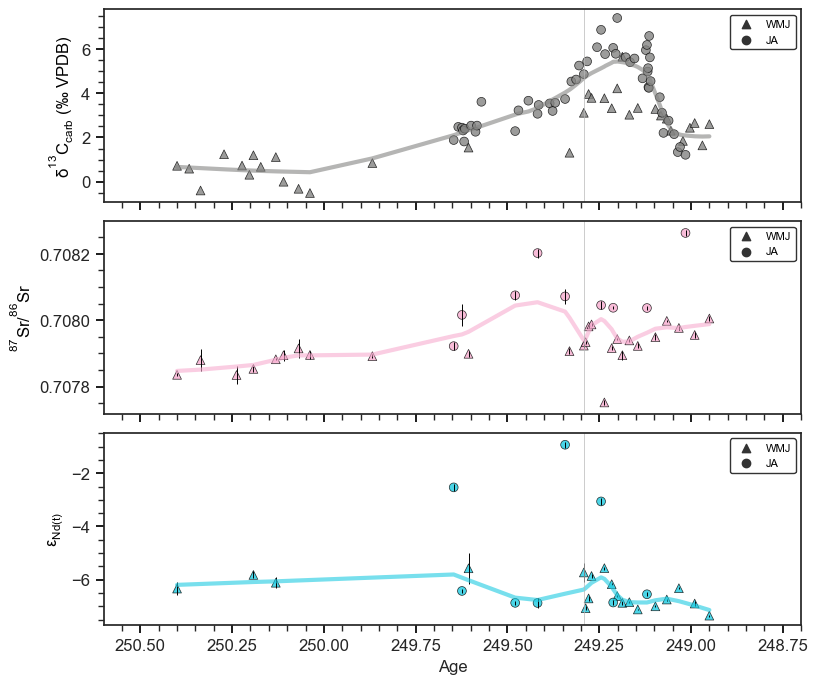

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(9, 8), sharex=True)
(ax0, ax1, ax2) = ax
fig.subplots_adjust(hspace=0.1, wspace=0.25)

axes = [ax0, ax1, ax2]

ax = plt.gca()

for i in range(1, 3, 1):
    axes[i].errorbar(x=x_axis[i], y=y_axis[i], xerr=None, yerr=y_err[i],
                     alpha=1, ecolor='black', markersize=20,
                     linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
for i in range(len(axes)):
    axes[i].plot(smoothed[i][:, 0], smoothed[i][:, 1],
                 c=colors[i], linewidth=3, alpha=.6)
for i in range(3):
    sns.scatterplot(x=x_axis[i], y=y_axis[i], ax=axes[i], data=df[i], edgecolor="black",
                    alpha=.8, legend=True, style='Locality', markers=markers, s=40, color=colors[i]
                    )
    axes[i].invert_xaxis()
    axes[i].tick_params(labelsize=f_size, color="black",)
    axes[i].set_xlim(250.6, 248.7)
    axes[i].set_ylabel(labels[i], fontsize=f_size, c="black")
    axes[i].legend(loc='upper right', ncols=1, fontsize=8, labelcolor='black',
                   markerscale=1, edgecolor='black')
    axes[i].minorticks_on()
    axes[i].axvline(x=249.292, linewidth=.5, color="#b8b8b8", linestyle='-')

plt.savefig(f'{save_path}Nd_Sr.pdf')
